In [1]:
import seaborn as sns 
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plot
%matplotlib inline

import bqplot.pyplot as plt

from random import sample, seed

# Statistics 

What is statistics?<br>
"Statistics" is derived from the Latin word "status" which means a political state. In early times, the meaning was restricted to information about states, particularly demographics such as population. Basic forms of statistics have been used since the beginning of civilization. Early empires often collated censuses of the population or recorded the trade in various commodities. The Han Dynasty and the Roman Empire were some of the first states to extensively gather data on the size of the empire's population, geographical area and wealth.<br>
<br>
Modern statistics is complex and diverse. The underlyinhg idea remains the same - find methods to analyse data systematically and display the results in tables and charts. With every data aggregation step, you are losing information, with the benefit of gaining an overview and making it easier for human beings to understand.<br>
<br>
Generally, statistics can be categorized into two main branches: 
- descriptive statistics, which gives information that describes the data in some manner
- inferential statistics makes inference about populations using sample data drawn from the population<br>

Inferential Statistics,  allows us to make inferences of a population from its subpopulation. Unlike descriptive statistics, inferential statistics are never 100% accurate because its calculations are measured without the total population.

# Descriptive statistics
Let's start with some basic terminology: 
- **population**: To collect data for any statistical study, a population must first be defined. 'Population' indicates a group that has been designated for gathering data from. The data is information collected from the population. A population is not necessarily referring to people. For example, a population could be a group of people, measurements of rainfall in a particular area or stock prices.
- **sampling units**: A single section selected to research and gather statistics of the whole. For example, when studying a group of college students, a single student could be a sampling unit.
- **sample**:  A sample is a set of data taken form the population to represent the population. This is useful as it is sometimes impossible or to costly and impractical to use data from the entire population. Probability distributions, hypothesis testing, correlation testing and regression analysis all fall under the category of inferential statistics.
- **attributes**: The characteristics of the item under study, like the points reached in an exam or length of screws.
- **variables**: A variable is a logical set of attributes. By definition, they can *vary* within a usually well defined range (also called domain) and depend on the attribute. E.g. the score of one student is 70% with a possible range of 0% - 100%. 

Different attributes require different methods for data analyis. For example, it is impossible to calculate the average of gender. Therefore, statistics further distinguishes attributes between:
- **nominal**: Qualitative attributes that cannot be ordered, like gender or nationality.
- **ordinal**: A number that tells the position of something in a list, such as 1st, 2nd, 3rd, 4th, 5th etc. It can therefore be considered as providing a ranking of attributes. E.g. school grades or position in tournaments.
- **metric**: Quantitative attributes that can not only be ranked, but are directly comparable as they are part of common metric. For example points in an exam. While grades only provide information a the ranking (A is better then B), points also carry information on the exact position in the possible range (domain).<br>  
 
**Discrete** versus **continuous** is a further important distinction. While age is essentially continuous (you age evey instance of time), we usually assign a diskrete number and "age" only once a year. Similar discretiziations are frequently done with metrics like height, weights, length etc.<br>
The distinction is often not immediately obvious. Prices in supermarkets are discrete as they do not have unlimited decimal precision. Times in 100m sprints are also displayed in discrete numbers but since they could theoretically be measured with more and more decimal precision, these arributes are continuous in nature. 


# Using tables to describe data
It is often convenient to summarize data of attributes in a table. 
Lets's have a look at a simply fictional example which shows points scored in an exam. 

In [2]:
 
seed(1)
# define possible points domain (assumed to range from 0 - 10)
points = list(range(0,11))
# create a random results list 
mylist = range(20)
L=11 # possible points domain, ranging from 0 -10
result = sample(mylist, L)
result

[4, 18, 2, 8, 3, 7, 12, 14, 13, 10, 6]

In [3]:
population = sum(result)
population # the sum of the individual attributes is the population size

97

In [4]:

outcome = pd.DataFrame({"Points": points,"Frequency": result})
outcome.set_index('Points', inplace=True)
outcome

,Frequency
Points,
0,4
1,18
2,2
3,8
4,3
5,7
6,12
7,14
8,13


The relative freqency is calculated as the frequency at each possible variable (points in the exam) divided by the population. Multiplying by 100 gives the percent of students scoring a certain number of points. 

In [5]:
outcome["Relative Frequency"] = outcome["Frequency"]/population
outcome["Percent"] = outcome["Relative Frequency"] *100
outcome

,Frequency,Relative Frequency,Percent
Points,,,
0,4,0.041237,4.123711
1,18,0.185567,18.556701
2,2,0.020619,2.061856
3,8,0.082474,8.247423
4,3,0.030928,3.092784
5,7,0.072165,7.216495
6,12,0.123711,12.371134
7,14,0.144330,14.432990
8,13,0.134021,13.402062


In [6]:
# Quickly check if percent sums to 100 
sum(list(outcome["Percent"]))

100.0

Calculating cumulative frequencies can be a useful tool. If for instance the treshold to pass an exam is 5 points, one can easily determine the percent of students who did not pass the exam. 

In [7]:
outcome["Cumulative Frequency"] = outcome["Relative Frequency"].cumsum()
failed = round(outcome.iloc[5]["Cumulative Frequency"]*100,3)
print(f'{failed}% of students did not pass the exam.') 
outcome

43.299% of students did not pass the exam.


,Frequency,Relative Frequency,Percent,Cumulative Frequency
Points,,,,
0,4,0.041237,4.123711,0.041237
1,18,0.185567,18.556701,0.226804
2,2,0.020619,2.061856,0.247423
3,8,0.082474,8.247423,0.329897
4,3,0.030928,3.092784,0.360825
5,7,0.072165,7.216495,0.432990
6,12,0.123711,12.371134,0.556701
7,14,0.144330,14.432990,0.701031
8,13,0.134021,13.402062,0.835052


It is also often convenient to chart the results. 

In [8]:
list(outcome.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [9]:
 
plt.bar(list(outcome.index),outcome["Relative Frequency"]*100)
plt.show()

In [10]:
# with object model API 
from bqplot import (
    OrdinalScale, LinearScale, Bars, Axis, Figure
)
x_ord = OrdinalScale()
y_sc = LinearScale()

bar = Bars(x=list(outcome.index), y=outcome["Relative Frequency"]*100, scales={'x': x_ord, 'y':
y_sc})

ax_x = Axis(scale=x_ord, grid_lines='solid', label='X')
ax_y = Axis(scale=y_sc, orientation='vertical', tick_format='0.2f',
            grid_lines='solid', label='Y')

Figure(marks=[bar], axes=[ax_x, ax_y], title='Relative Frequency',
       legend_location='bottom-right')

Figure(axes=[Axis(label='X', scale=OrdinalScale()), Axis(label='Y', orientation='vertical', scale=LinearScale(…

In [11]:
fig = plt.figure(title='Cumulative Frequency')
plt.bar(list(outcome.index),outcome["Cumulative Frequency"]*100)
#plt.plot(x_data,y_data)
fig

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

Pie charts are also frequently used to display information like the relative frequency of grades. 

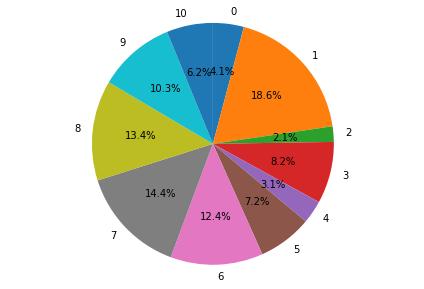

In [12]:

# Pie chart
points = [str(i) for i in outcome.index]
values = outcome["Relative Frequency"]*100
  
fig1, ax1 = plot.subplots()
ax1.pie(values, labels=points, autopct='%1.1f%%',counterclock=False,startangle=-270)
ax1.axis('equal')  
plot.tight_layout()
plot.show()

# Summary statistics 
In descriptive statistics, summary statistics are used to summarize a set of observations, in order to communicate the largest amount of information as simply as possible. 
- **measures of location** or central tendency: e.g. arithmetic mean or median
- **measures of statistical dispersion** is a nonnegative real number that is zero if all the data are the same and increases as the data become more diverse. E.g. standard deviation or range
- **measures of shape** of the distribution: e.g. skewness or kurtosis
- **measures of statistical dependence** if more than one variable is measured: e.g. correlation coefficient <br>

There is a further specification in statistics, called **moments** which is closely related to the above: a moment is a specific quantitative measure of the shape of a function.
- **mean** - first moment
- **variance** - second moment 
- **skewness** - third moment 
- **kurtosis** - forth moment <br>

For a distribution of mass or probability on a bounded interval, the collection of all the moments (of all orders, from 0 to ∞) uniquely determines the distribution. For the second and higher moments, the central moment (mean) is usually used rather than the moments about zero, because they provide clearer information about the distribution's shape. We will revisit these statements at a later time. <br>
<br> 
There also exist higher order moments which are outside the scope of this text. 

# Measures of location 
## Mean
The mean, also called arithmetic mean or average is calculated as the sum of the numerical values of each and every observation divided by the total number of observations. 
$${\sum {x_i} \over n }= \mu$$ <br>
<br>
Although Python has built in methods to handle this, the below formula demonstrates how to manually calculate the mean. 

In [ ]:
def mean_calculator(lst):
    return sum(lst)/len(lst)

In [27]:
list1 = [1,2,3,4,5,6]
mean_calculator(list1)

3.5

Assuming you have a fair dice, the above mean of 3.5 can be thought of as the expected value of rolling a dice, if repeated over and over again. We will revisit this idea when we discuss probabilities and the **law of large numbers**. 

### Moving averages 
If averages are calculated in time series, they are frequently calculated as moving averages. 

pifalls <br>
[Longevity and Plastic Surgery](https://consumer.healthday.com/senior-citizen-information-31/misc-aging-news-10/get-a-facelift-live-longer-400737.html)<br>
"A new study suggests women who have facelifts might live up to 10 years longer than women who don't get the plastic surgery."<br>
The study compared the average life expectancy of all women in America to women who had plastic surgery. Now, according to the study, the average age of these woman was 60 when they had the surgery. The statistical average life expectancy is calculated as the life expectancy of newborns under similar living standards. Unfortunately, there are babies and children who die. Looking at a subpopulation of women who had plastic surgery, implies that they couldnt have died as babies or children or at any given time prior to their surgery. 
In a nutshell, the average life expectency of students, police officers, people in a retirement home and about everyone else who didnt die as a child, is higher compared to the entire population. This is simple due to the fact that they survived childhood and as such, their average does not include people who died very young. 

## Median 
The median is the value separating the higher half from the lower half of a data sample. For a data set, it may be thought of as the "middle" value. For example, in the data set {1, 3, 3, 6, 7, 8, 9}, the median is 6, the fourth largest, and also the fourth smallest, number in the sample. The basic advantage of the median in describing data compared to the mean (often simply described as the "average") is that it is not skewed so much by a small proportion of extremely large or small values (so called outliers), and so it may give a better idea of a "typical" value. Median income, for example, may be a better way to suggest what a "typical" income is. If there is an even number of observations, then there is no single middle value; the median is then usually defined to be the mean of the two middle values.

In [149]:
def median(lst):
    lst.sort()
    length = len(lst)
    if (length % 2 == 0):
        return (lst[(length)//2] + lst[(length)//2-1]) / 2
    return lst[(length-1)//2]

In [150]:
numbers = [2, 3 ,1 ,4,5]
median(numbers)

3

## Mode 
The number which appears most often in a set of numbers. 

since it is expected value of mean by design, use teh below to explain inference 

In [73]:
np.random.seed(0)
mean = 100 
standard_deviation = 20 
array_size = 10
d = np.random.normal(mean,standard_deviation,array_size)
mean_calculator(d)

114.7604634145767

In [74]:
d

array([135.28104692, 108.00314417, 119.57475968, 144.81786398,
       137.3511598 ,  80.4544424 , 119.00176835,  96.97285583,
        97.93562296, 108.21197004])

In [86]:
#law of large numbers - repeatedly drawn samples 
repeat_random_draw = 10000
random_draws = []
random_draws = [list(np.random.normal(mean,standard_deviation,array_size)) for i in range(repeat_random_draw)]
merged_list = []

for l in list(random_draws):
    merged_list += l

merged_list[:15]

[149.48012478823358,
 122.06319721650472,
 79.8125844744931,
 116.3864457351066,
 122.86915109211427,
 90.91765437467275,
 120.71767902088945,
 106.55643503776136,
 99.84866084833787,
 117.52431672360649,
 93.96940951348012,
 88.80396525023599,
 79.1624618984634,
 81.10180007577048,
 118.8815507010562]

In [95]:
single_sample_mean = mean_calculator(d)
repeated_sample_mean = mean_calculator(merged_list)
print(f'A single random sample with only {array_size} numbers can result in a mean that is very far from the true population mean of {mean}. \nIn our example this mean is {round(single_sample_mean,2)}.\nHowever, repeatedly drawing the same random draws envokes the law of large numbers. \nIn our example we have {repeat_random_draw} random sample draws and the result is a mean of {round(repeated_sample_mean,2)}!')

A single random sample with only 10 numbers can result in a mean that is very far from the true population mean of 100. 
In our example this mean is 114.76.
However, repeatedly drawing the same random draws envokes the law of large numbers. 
In our example we have 10000 random sample draws and the result is a mean of 100.07!


In probability theory, the law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.
For example, a single roll of a fair, six-sided dice produces one of the numbers 1, 2, 3, 4, 5, or 6, each with equal probability. Therefore, the expected value of a single dice roll is

$\frac {1+2+3+4+5+6}{6}=3.5$ <br>
According to the law of large numbers, if a large number of six-sided dice are rolled, the average of their values (sometimes called the sample mean) is likely to be close to 3.5, with the precision increasing as more dice are rolled.

In [15]:
fig1 = plt.figure(title='Cumulative Frequency')
plt.hist(d)
#plt.plot(x_data,y_data)
fig1

Figure(axes=[Axis(orientation='vertical', scale=LinearScale()), Axis(scale=LinearScale())], fig_margin={'top':…

In [17]:
df = pd.DataFrame({"Mean" :  np.mean(d),
"Median" : np.median(d), "Mode" : stats.mode(d)[0][0]}, index=["Results"])
df

,Mean,Median,Mode
Results,99.094866,98.839439,39.077139


In [18]:
# add outliers: the second one illustrates that median is not influenced at all if there are large outliers on either side
d1 = np.append(d,[300000,-2])

In [19]:
df1 = pd.DataFrame({"Mean" :  np.mean(d1),
"Median" : np.median(d1), "Mode" : stats.mode(d1)[0][0]}, index=["Results"])
df1


,Mean,Median,Mode
Results,398.296273,98.839439,-2.0


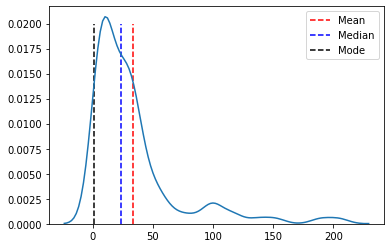

In [25]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 100)

dfs = pd.DataFrame({"Mean" :  np.mean(s),
"Median" : np.median(s), "Mode" : stats.mode(s)[0][0]}, index=["Results"])

plot.vlines(dfs["Mean"], 0,0.02,color='r', linestyle='--')
plot.vlines(dfs["Median"], 0,0.02,color='b', linestyle='--')
plot.vlines(dfs["Mode"], 0,0.02,color='k', linestyle='--')

plot.legend({'Mean':dfs["Mean"],'Median':dfs["Median"],'Mode':dfs["Mode"]})
sns.distplot(s, hist=False );

In [21]:
dfs

,Mean,Median,Mode
Results,32.492141,21.705421,3.260636


The expected value of a random variable, intuitively, is the long-run average value of repetitions of the same experiment it represents. For example, the expected value in rolling a six-sided die is 3.5, because the average of all the numbers that come up is 3.5 as the number of rolls approaches infinity. In other words, the law of large numbers states that the arithmetic mean of the values almost surely converges to the expected value as the number of repetitions approaches infinity.

# Forecasting 

https://github.com/Auquan/Tutorials

## Why should you care? 

Generally, the importance of forecasting is self evident - after all, we try to forecast all the time in daily life. 

*"You do not plan to ship goods across the ocean, or assemble merchandise for sale, or to borrow money without first trying to determine what the future may hold in store. Ensuring that the materials you order are delivered on time, seeing to it that the items you plan to sell are produced on schedule, and gettiing your sales facilities in place all must be planned before that moment when the customers show up and lay their money on the counter. The successful business executive is a forecaster first: purchasing, producing, marketing, pricing, and organizing all follow."* - Peter Bernstein. Againts the Gods: The Remarkable Story of Risk. New York: John Wiley & Sons, 1996, pp. 21-22. 

All assets are simply sequences of cashflows, as Andrew Lo vivedly explains in his
[MIT Open Courseware](https://ocw.mit.edu/courses/sloan-school-of-management/15-401-finance-theory-i-fall-2008/video-lectures-and-slides/) lectures. To determine the value of an asset, you need to figure out what these cashflows will be, and discount them back to today. Sometimes, for instance with fixed coupon bonds, this sequence will be relatively easy to determine. Other times, cashflows may be very difficult to pin down. This is why forecasting plays a crucial role in pretty much any business decision.    


## The conditional forecasting idea 
What is the most likely value of Y if X happens to take a specific value x?
- X and Y are conceptualized as random variables 
- X is the information set for constructing the forecast
e.g. X = average income, Y = sales of smartphones   

The information set X can also be historical values of Y up to time T, where we want to forecast Y going forward
- $X = \{ Y_T, Y_{T-1}, Y_{T-2}, ..., Y_1 \} $ denotes current and historical GDP
- $Y = \{ Y_{T+1}, Y_{T+2}, Y_{T+3}, ..., Y_{T+k} \} $ denotes future GDP that we want to forecast     

An intuitive way to generate the required conditional forecast is to 
- draw the **"best fitting"** line that passes through the center of the data cloud
- simply read off the required conditional forecast  from the fitted line   

Is this a good approach?  
If so, is it always good?   
If not, in what situations can it be bad?   

To answer these questions, we need a formal probabilistic framework to assess the properties of the procedure and the corresponding forecasts. That is why we need a statistical model.   

Understanding the basics of forecasting is crucial for anyone and helps interpreting or evaluating the quality of forecasts produced by others. For example, spurious correlations, in which two or more events or variables are associated but not causally related, due to either coincidence or the presence of a certain third, unseen factor (commonly referred to as a "confounding factor") are very common in time series. This frequently leads to misleading statistical evidence. Below are some interesting resources highlighting this problem:  
- [Highway fatalities and fresh lemon imports](https://pubs.acs.org/doi/abs/10.1021/ci700332k)
- [Clive W.J. Granger Nobel Prize Lecture](https://www.nobelprize.org/prizes/economic-sciences/2003/granger/lecture/)
- [A drunk and her dog](http://www-stat.wharton.upenn.edu/~steele/Courses/434/434Context/Co-integration/Murray93DrunkAndDog.pdf)
and a brilliant example for anyone who speaks German
- [Catalytic Converters and HIV](https://www.jku.at/fileadmin/gruppen/118/katalysatorenundaids.pdf)   

Another issue with the "best fitting" line relates to an illustration known as the [Anscombe quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) where four sets of data are identical when examined using simple summary statistics, but vary considerably when graphed. This is illustrated below. 

In [99]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.ticker as ticker

,Dataset 1,Dataset 2,Dataset 3,Dataset 4
Results,,,,
slope,0.500091,0.500091,0.500091,0.500091
intercept,3.000091,3.000091,3.000091,3.000091
r_value,0.816421,0.816421,0.816421,0.816421
p_value,0.002170,0.002170,0.002170,0.002170
std_err,0.117906,0.117906,0.117906,0.117906


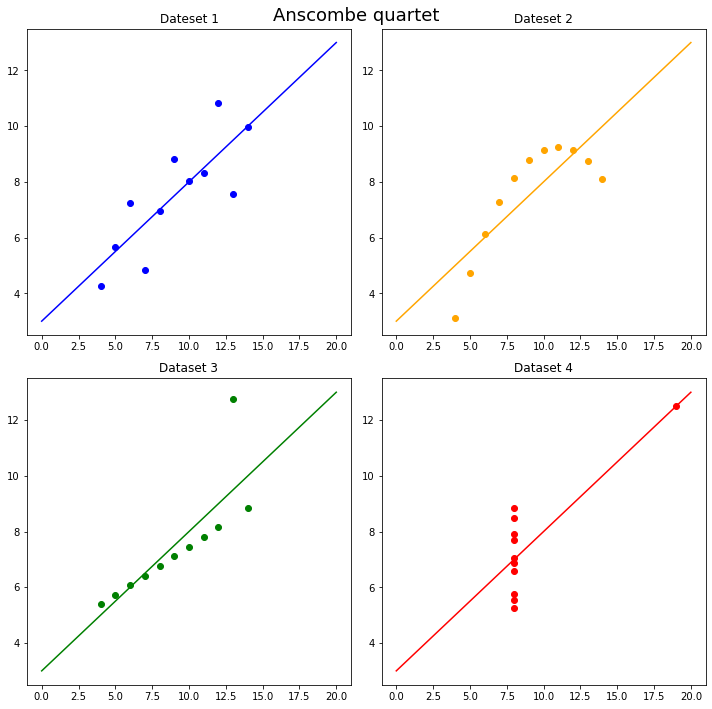

In [100]:
# create lists that contain the original datasets used 
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# set axes limits 
xmax = 20
ymax = 14

fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle("Anscombe quartet", fontsize=18,color='black')

# headers for linear regression results (dont worry about linear regresson yet) 
results = ["slope", "intercept", "r_value", "p_value", "std_err"]

# Dataset 1
slope, intercept, r_value, p_value, std_err = linregress(x1, y1) # creates the regression result
ax[0, 0].scatter(x1, y1,color='blue') # for the scatter plot 
ax[0, 0].set_title('Dateset 1')
ax[0,0].plot([0, xmax], [intercept, slope * xmax + intercept],color='blue') # plots the linear regression using the results
output1 = []
for k in linregress(x1, y1): 
    output1.append(k)    

# Dataset 2
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
ax[0, 1].scatter(x2, y2,color='orange')
ax[0, 1].set_title('Dateset 2')
ax[0,1].plot([0, xmax], [intercept, slope * xmax + intercept],color='orange')
output2 = []
for k in linregress(x1, y1): 
    output2.append(k)  

# Dataset 3
slope, intercept, r_value, p_value, std_err = linregress(x3, y3)
ax[1, 0].scatter(x3, y3,color='green')
ax[1, 0].set_title('Dataset 3')
ax[1,0].plot([0, xmax], [intercept, slope * xmax + intercept],color='green')
output3 = []
for k in linregress(x1, y1): 
    output3.append(k)  

# Dataset 4 
slope, intercept, r_value, p_value, std_err = linregress(x4, y4)
ax[1, 1].scatter(x4, y4,color='red')
ax[1, 1].set_title('Dataset 4')
ax[1,1].plot([0, xmax], [intercept, slope * xmax + intercept],color='red')
output4 = []
for k in linregress(x1, y1): 
    output4.append(k)  

plt.tight_layout()
plt.subplots_adjust(top=0.95)

df = pd.DataFrame(output1)
df['Dataset 2'] = pd.Series(output2).values
df['Dataset 3'] = pd.Series(output3).values
df['Dataset 4'] = pd.Series(output4).values
df["Results"] = results
df.rename(columns={0:'Dataset 1'}, inplace=True)
df = df.set_index("Results")
df

## explain OLS with degenerated GMM and matrix algebra    
tbc 

### Probability and Statictics: A brief Review
Before we dive deeper into the subject matter, we need to freshen up our statistics skills.   

Random Variable: A **random variable**, X,  is a variable quantity (i.e., not necessarily fixed) whose possible values depend on a set of random events. Like a traditional mathematical variable, its value is unknown a priori (before the outcome of the events is known) A random variable's possible values might represent the possible outcomes of a yet to occur event. This event  can take on a range of values, each with an associated probability, giving the random variable a probability distribution

An example of a random varibale is the value of a roll of a die. This variable,X, can take values 1 - 6, each with a probability of ⅙, but it’s exact value is unknown till the die roll is actually performed. A **probability distribution** is a mathematical function that assigns a probability to every possible value of a random variable.
For example, the random variable X that represents the value of a die rolls and can take values 1 to 6, each with a probability of ⅙ has a distribution: $P(X=i) = 1/6$, where i = 1,2,3,4,5,6

Random variables can be separated into two different classes:
 - **Discrete random variables**: Let X be the number of [free throws](https://en.wikipedia.org/wiki/Free_throw) made by a basketball player out of two attempts. X can only take three possible values: 0, 1, or 2. The PDF (probability density function) shows the probabilities of occurence of the three possible outcomes. Discrete Random Variable have finitely countable outcomes. For example, the value of a coin toss can only be H or T, each with a probability of $1/2$. Similarly the value of a die roll can only be between 1 and 6. For discrete random variables where X can take a finite set of values, the probability distribution function,  gives the probability $p(x)$ that X is exactly equal to some value.
$p(x) = P(X=x)$, where x belongs to the finite set of values that are possible  
 - **Continuous random variables**: For continuous random variables (where X can take an infinite number of values over a continuous range), the probability of a single point, the probability that X is exactly equal to some value is zero. In this case, the probability distribution function,  gives the probability over intervals which can include infinitely many outcomes. Here we define a **probability density function** (PDF), $f(x)$, such that we can say:
$$P(a < X < b) = \int_a^b f(x)dx$$ 
For example, if you buy a piece of rope and the scale reads 1 meter, this value is possible but the probability that the length is exactly 1 meter is zero; You can keep increasing the accuracy of your instrument so that the probability of measuring exactly 1m tends to zero. However, we might be able to say that there is 99% probability that the length is between 99cm and 1.01 m. 
Just like a probability distribution function $f(x)$ gives the probability that a random variable lies in a range, a  cumulative distribution function $F(x)$ describes the probability that a random variable is less than or equal to a given value.
$$F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) dt $$


In [124]:
outcomes = [0,1,2]
np.random.seed(17)
start = 0
end = 3 
repeated_trials = 150 
throws =np.random.randint(0, 3, repeated_trials)
result = Counter(throws)
probability = [round(i/repeated_trials,3)  for i in result.values()]
print(probability)
print(f'The individual probabilities of {probability} sum up to {round(sum(probability),3)*100}%.')

[0.36, 0.367, 0.273]
The individual probabilities of [0.36, 0.367, 0.273] sum up to 100.0%.


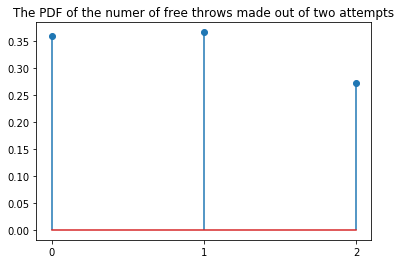

In [125]:
fig, ax = plot.subplots()
ax.stem(outcomes, probability, use_line_collection= True)
ax.xaxis.set_major_locator(ticker.FixedLocator(outcomes))
ax.set_title("The PDF of the numer of free throws made out of two attempts")

plot.show()

A probability distribution function has two main properties:
1. $0 \leq p(x) \leq 1$ because all probabilities are in the interval $[0, 1]$
2. The sum of all probabilities $p(x)$ over all values of X is equal to $1$. The total weights for all values of the random variable must add to $1$.

The moments of a probability distribution (build this into the generalized method of moments GMM discussion) measure its features such as location, spread, and shape. The first four moments - mean, variance, skewness and kurtosis - are the most important.   

- Mean (expected value) of a random variable is the probability-weighted average of all possible values.
When these probabilities are equal, the expected value is the same as arithmetic mean, defined as the sum of the observations divided by the number of observations:
$$\mu = \frac{\sum_{i=1}^N X_i}{N}$$

where $X_1, X_2, \ldots , X_N$ are our observations.

For example, if a dice is rolled repeatedly many times, we expect all numbers from 1 - 6 to show up an equal number of times. So the expected value in rolling a six-sided die is 3.5. Let us illustrate this and have some fun with timing different methods. 

The most widely used distribution with widespread applications in finance is the normal distribution.

# Normal Distribution

Many important tests and methods in statistics, and by extension, finance, are based on the assumption of normality. A large part of this is due to the results of the Central Limit Theorem (CLT) which states that the sum of many independent random variables tends toward a normal distribution, even if the original variables themselves are not normally distributed. The convenience of the normal distribution finds its way into certain algorithmic trading strategies as well. 

Normal distributions are described by their mean ($\mu$) and variance ($\sigma^2$, where $\sigma$ is the standard deviation). The probability density of the normal distribution is:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

And is defined for $-\infty < x < \infty$. When we have $\mu = 0$ and $\sigma = 1$, we call this the standard normal distribution.

By changing the mean and standard deviation of the normal distribution, we can change the depth and width of the bell curve. With a larger standard deviation, the values of the distribution are less concentrated around the mean.

## Standardizing Random Variables to Normal Distribution

**The power of normal dsitributions lies in the fact that using the central limit theorem, we can standardize different random variables so that they become normal random variables** 

We standardize a random variable $X$ by subtracting the mean and dividing by the variance, resulting in the standard normal random variable $Z$.

$$
Z = \frac{X - \mu}{\sigma}
$$


In [ ]:
def rollDie_fast(number):
    rolls = [0] * 6
    for i in range(0, number):
        roll=int(random.randint(1,6))
        rolls[roll - 1] += 1
    return rolls
rollDie_fast(1000)

In [ ]:
%timeit rollDie_fast(1000)

In [ ]:
def rollDie_slow(number):
    rolls = [0] * 6
    for i in range(0, number):
        values = [1, 2, 3, 4, 5, 6]
        probs = [1/6 for i in values]
        roll=np.random.choice(values, p=probs)
        rolls[roll - 1] += 1
    return rolls
rollDie_slow(1000)

In [ ]:
%timeit rollDie_slow(1000) # if you try this with say 100000 you will see what difference this makes!

When the probabilities of different observations are not equal, i.e a random variable $X$ can take value $X_1$ with probability $p_1$, $X_2$ with probability $p_2$, and so on, the expected value of X is the same as <i>weighted</i> arithmetic mean.
The weighted arithmetic mean is defined as
$$\sum_{i=1}^n p_i X_i $$

where $\sum_{i=1}^n p_i = 1$  

Therefore, the expected value is the average of all values obtained you perform the experiment it represents many times. This follows from the law of large numbers - the average of the results obtained from a large number of repetitions of an experiment should be close to the expected value, and will tend to become closer as more trials are performed.

### Some properties of expected values that are handy:
* The expected value of a constant is equal to the constant itself $E[c] = c$
* The expected value is linear, i.e $E[aX+bY] = aE[X]+bE[Y]$ 
* If $X \leq Y$ , then $E[X] \leq E[Y]$
* The expected value is not multiplicative, i.e. $E[XY]$ is not necessarily equal to $E[X]E[Y]$. 
  The amount by which they differ is called the covariance.
  $Cov(X,Y)=E[XY]-E[X]E[Y]$
  If X and Y are uncorrelated, $Cov(X,Y)=0$

# Variance and Standard Deviation

Variance and Standard Deviation are measures of dispersion of dataset from the mean.

We can define the mean absolute deviation as the average of the distances of observations from the arithmetic mean. We use the absolute value of the deviation, so that 5 above the mean and 5 below the mean both contribute 5, because otherwise the deviations always sum to 0.

$$ MAD = \frac{\sum_{i=1}^n |X_i - \mu|}{n} $$

where $n$ is the number of observations and $\mu$ is their mean.

Instead of using absolute deviations, we can use the squared deviations, this is called **variance** $\sigma^2$ : the average of the squared deviations around the mean:
$$ \sigma^2 = \frac{\sum_{i=1}^n (X_i - \mu)^2}{n} $$

**Standard deviation** is simply the square root of the variance, $\sigma$, and it is the easier of the two to interpret because it is in the same units as the observations.

Note that variance is additive while standard deviation is not.

In [ ]:
x= rollDie_fast(1000)
print('Variance of x1:', np.var(x))
print('Standard deviation of x1:', np.std(x))
print("The standard deviation is simply the square root of the variance which is {} here".format(np.sqrt(np.var(x))))

Standard deviation indicates the amount of variation in a set of data values. A low standard deviation indicates that the data points tend to be close to the expected value, while a high standard deviation indicates that the data points are spread out over a wider range of values.
 
### Some properties of standard deviation that are handy:

* The standard deviation of a constant is equal to 0
* Standard deviations cannot be added. Therefore, $\sigma(X+Y)\neq \sigma(X) + \sigma(Y)$
* However, variance, can be added. Infact, $\sigma^2(X+Y) = \sigma^2(X) + \sigma^2(Y) + Cov(X,Y)$
* If X and Y are uncorrelated,  $Cov(X,Y)=0$ and $\sigma^2(X+Y) = \sigma^2(X) + \sigma^2(Y)$

## Volatility

If an experiment is performed daily and the results of an experiment on one day do not affect the on their results any other day, daily observation are uncorrelated. If we measure daily standard deviation as $\sigma_i$ then we can calculate the standard deviation for an year, also called annualized standard deviation as:
$$\sigma_{ann} = \sqrt{\sum_{i=1}^T \sigma_i^2}$$

In finance, we sum over all trading days and this annualized standard deviation is called **Volatility**.

# These are Only Estimates

It is important to remember that when we are working with a subset of actual data, these computations will only give you sample statistics, that is mean and standard deviation of a sample of data. Whether or not this reflects the current true population mean and standard deviation is not always obvious, and more effort has to be put into determining that. This is especially problematic in finance because all data are time series and the mean and variance may change over time. In general do not assume that because something is true of your sample, it will remain true going forward.

1. Time series decomposition 
 
• Conceptually a time series consists of three components:  
 
Time series = Trend  +  Seasonals  +  Cycles      
 
• Here we will focus on the third component of a time series, namely, cycles or cyclical movements.  
 
• Consider Hong Kong’s GDP (in logarithm) that we analyzed before. Regression analysis can effectively decompose the GDP series into each of the three components.   
 
• A regression of LOGGDP on a (quadratic) time trend isolates the trend and detrended components:     
 
$LOGGDP_t = \hat{\beta}_0 + \hat{\beta}_1t +\hat{\beta}_2t^2 + e_t^\alpha   $
 
Fitted values:   $ TREND_t = \hat{\beta}_0 + \hat{\beta}_1t +\hat{\beta}_2t^2 $
 
Residuals:  $e_t^\alpha = LOGGDP_t - TREND_t =      detrended \text{ }LOGGDP $


A regression of detrended LOGGDP on seasonal dummies isolates the seasonal and cyclical components:

$e_t^\alpha = \hat{\alpha}_1D_{1t} + \hat{\alpha}_2D_{2t} + \hat{\alpha}_3D_{3t} + \hat{\alpha}_4D_{4t} + e_t^b $


Fitted values: $ SEASONALS_t = \hat{\alpha}_1D_{1t} + \hat{\alpha}_2D_{2t} + \hat{\alpha}_3D_{3t} + \hat{\alpha}_4D_{4t}$

Residuals: $e_t^b = detrended \text{ }LOGGDP - SEASONALS = cyclical \text{ } LOGGDP $  


The up-and-down pattern of the cyclical component is irregular, unlike the rigid pattern of the seasonal component.  
 
• Cycles are important for forecasting, because their history conveys information regarding their future.  
 

In [ ]:
# add code


# Covariance stationary time series 


A sequence of random variables indexed by time $\{...,y_{-2} ,y_{-1} ,y_{o} ,y_{1} ,y_{2} ,...\} 
\equiv \{y_t\}$,  is called a stochastic process or **time series process**. When we collect a time series data set (such as Hong Kong’s GDP), we obtain a segment of a realization, $ \{ y_{1}^r ,y_{2}^r,...,y_{T}^r\}$, of the stochastic process.  
 
• A (strictly) stationary time series process is one whose probabilistic properties do not depend on the time at which the series is observed. This allows us to make statistical inference about unrealized future values of the process based on observed historical data.  
 
• A series of independently and identically distributed  (iid) random variables is the simplest example of stationary time series – it does not matter when you start to observe it, it follows the same probability law at any period of time.  
 
• For forecasting purpose, a weaker form of stationarity suffices. What we need is that the mean of the process and its covariance structure (i.e. the covariances between current and past values) to be stable over time. 

<div class="alert alert-block alert-info">
<b>Covariance stationary process:</b> A stochastic process $\{ y_t\}$ ty with a finite second moment (i.e. $E(y_t^2) <∞$) is covariance stationary if <br>
<li> $E(y_t^2) = μ $, a constant that does not depend on t. </li>
<li> $cov(y_t,y_{t-\tau} )$ depends only on displacement $\tau$ and also not on t.</li>
</div> 

Autocovariance (ACV) 
Autocorrelation function ACF (push Pearson corr up form below)
Correlogram (plot ACF against displacment tau)
- dampening ACF indicates AR 
- cut-off indictes MA 
show with code and mathematically (slutzky yule phenomenon)
Partial autocorrelation function (ACF) 
- also help determine ARMA model in practice 


White noise: types and show ACF & PACF 
- white noise tests 
sample ACF and PACF (above are population) - envoke law of large numbers 


## Wold's theorem   
The celebrated Wold’s representation theorem states that any covariance stationary time series can be represented by some MA(∞) process, which has an important implication for modelling a covariance stationary time series.   

Notice that the given covariance stationary time series ${y_T } $ can be serially correlated in any manner but the white noise series ${\epsilon_t }$ is known to be serially uncorrelated. Is it possible to create serial correlation out of purely random noise? The answer is yes according to Wold’s theorem. By taking weighted average of  (infinitely) many purely random terms, one can create any pattern of serial correlation.    

We can use computer simulation to demonstrate the idea of creating serial correlation by summing up white noise. This is known as the Slutzky-Yule phenomenon in statistics. 


In [ ]:
# demonstrate with code 

In practice there is no way we can estimate the MA(∞) as stated in Wold’s theorem, because there are infinitely many unknown parameters { , 1,2,...} i bi = but we only have finite amount of data.  
 • Use the lag operator L to write down the MA(∞) model in terms of polynomial: 
 
 
 rational polynomial

It is important to remember that the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) measures only the linear correlation between two variables X and Y. Take for example 
$Y = X^2 + Z$, where X and Z are independent N(0,1). As can be seen in the chart below, X and Y are clearly not independent. 

In [ ]:
mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100000)
x_squared = x*x
z = np.random.normal(mu, sigma, 100000)
y = x_squared + z
plt.scatter(x,y)
correlation = round(np.corrcoef(x,z)[1][0],2)

print("The correlation coefficient is {}".format(correlation))
print("Although X and Y are clearly not independent, their correlation is essentially zero.")

Therefore, zero covariance or correlation does not imply independence, because X and Y could be nonlinearly related. If, however, X and Y are normally distributed with zero covariance, then they are independent. 

$P(E)  = {n \choose k} p^k (1-p)^{ n-k}$
\begin{equation*}
P(E)   = {n \choose k} p^k (1-p)^{ n-k}
\end{equation*}
